In [ ]:
from sklearn import datasets
data = datasets.load_diabetes()

In [ ]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
import pandas as pd
df = pd.DataFrame(data.data , columns = data.feature_names)

In [ ]:
df['target'] = data.target

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
437,False
438,False
439,False
440,False


In [ ]:
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [ ]:
X = df.drop(['target'] , axis =1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 500)

gbr.fit(X_train , y_train)
pred = gbr.predict(X_test)

In [ ]:
print(pred)

[251.06595121 205.56289125 179.85705675 136.31592241 212.97766292
 226.13396728 103.96961808 214.57708437 115.41643171 259.22463726
 200.07903345 149.83381635 122.49767269  93.72752111 308.01687012
  98.16895381 148.08802187  54.72366919 100.24383396 256.47059022
 152.80710738 127.54205669 187.25970754 146.55660359 213.07718057
 186.68199607 153.06754318  66.80739609 273.02793001 128.37364361
 211.27698808  81.59559227 150.79557459 158.95375957 154.17477361
 164.47667227 176.4382179  120.11136791  98.22209211 195.91362202
 125.21481455 147.65873841  94.68295302 178.67984899 153.01676467
  87.516417   122.85298779 118.84166227  77.1481149  284.89983435
 139.34201361  44.09909738 130.15534215 164.55665853 241.48431364
 168.08942471 204.87884266 124.80532768  90.25600828 183.34060951
 249.97172419 156.79067317 125.6020672   80.28293777 265.35997969
 149.86257416  85.48633701 280.47539755 234.53098238 111.38000352
  84.83530803 144.36098797 136.40289513 125.82209324 133.57706286
 144.84492

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred , y_test)
print(mae)

52.18820678727787


HyperParameterTuning

In [ ]:
feature_scores =pd.Series(gbr.feature_importances_ , index = X_train.columns).sort_values(ascending = False)
print(feature_scores)

s5     0.384552
bmi    0.213660
bp     0.092073
s2     0.077971
s6     0.055093
s3     0.053778
age    0.045810
s1     0.042729
s4     0.018442
sex    0.015894
dtype: float64


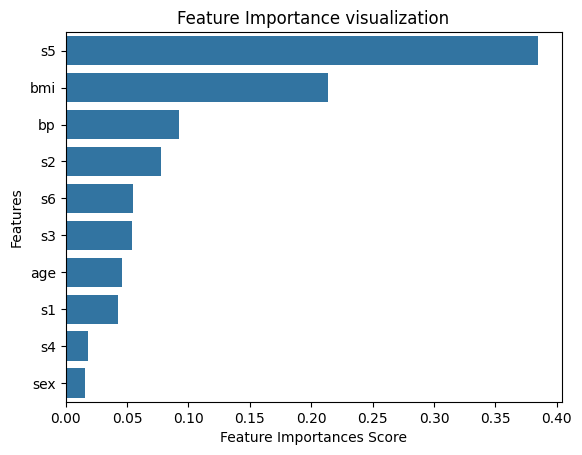

In [ ]:
sns.barplot(x = feature_scores , y = feature_scores.index)
plt.xlabel('Feature Importances Score')
plt.ylabel('Features')
plt.title('Feature Importance visualization')
plt.show()

In [ ]:
Xn = df.drop(['s6' ,'s3' , 'age' , 's1' ,'s4' , 'sex'] , axis =1)
yn = df['target']

In [ ]:
X_trainn , X_testn , y_trainn , y_testn = train_test_split(Xn , yn , test_size = 0.2 , random_state = 0)

gbr2 = GradientBoostingRegressor(n_estimators = 500)

gbr2.fit(X_trainn , y_trainn)
pred2 = gbr2.predict(X_testn)

In [ ]:
mae2 = mean_absolute_error(pred2 , y_testn)
print(mae2)

0.7291594357790594


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_testn , pred2)
print(mse)

1.9100664684105082


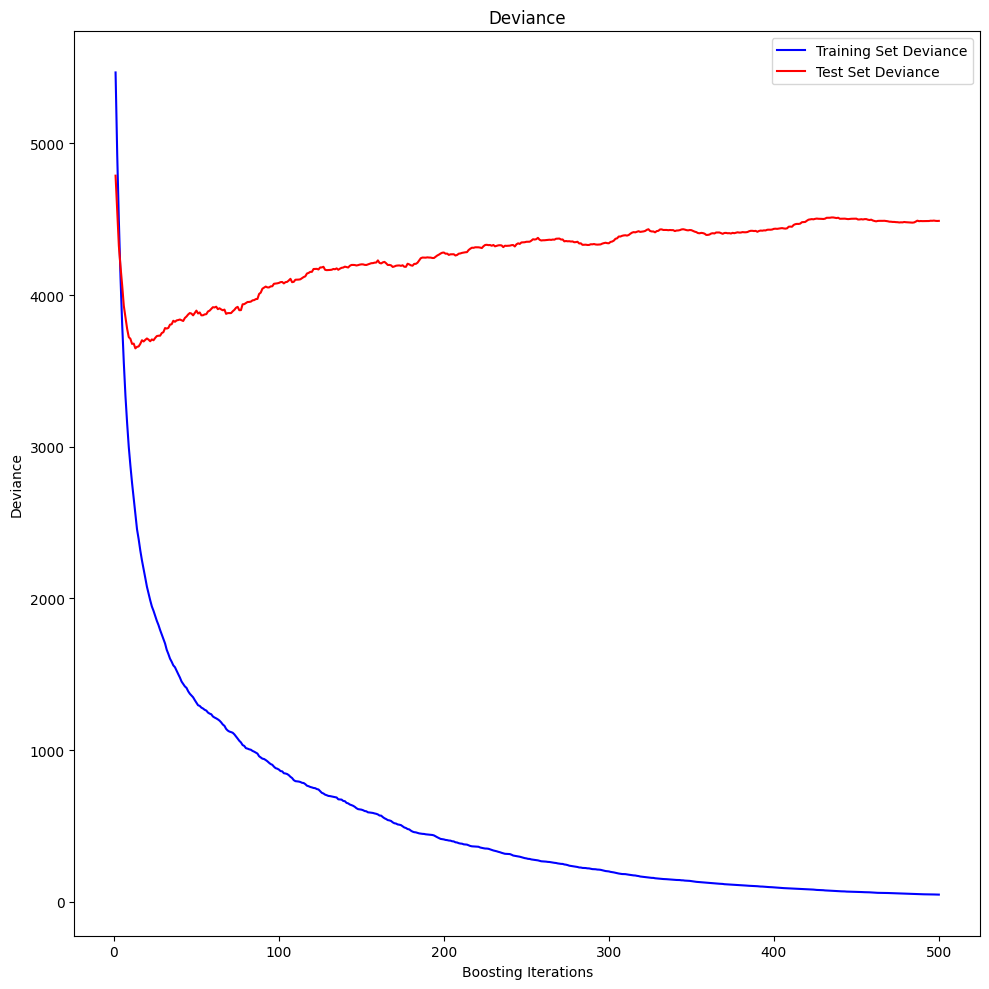

In [ ]:
test_score = np.zeros((500,), dtype = np.float64)
for i , pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test , pred)

fig = plt.figure(figsize = (10 , 10))
plt.subplot(1,1,1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1 , gbr.train_score_ , 'b-' , label = 'Training Set Deviance')
plt.plot(np.arange(500) + 1 , test_score , 'r-' , label = 'Test Set Deviance')
plt.legend(loc = 'upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

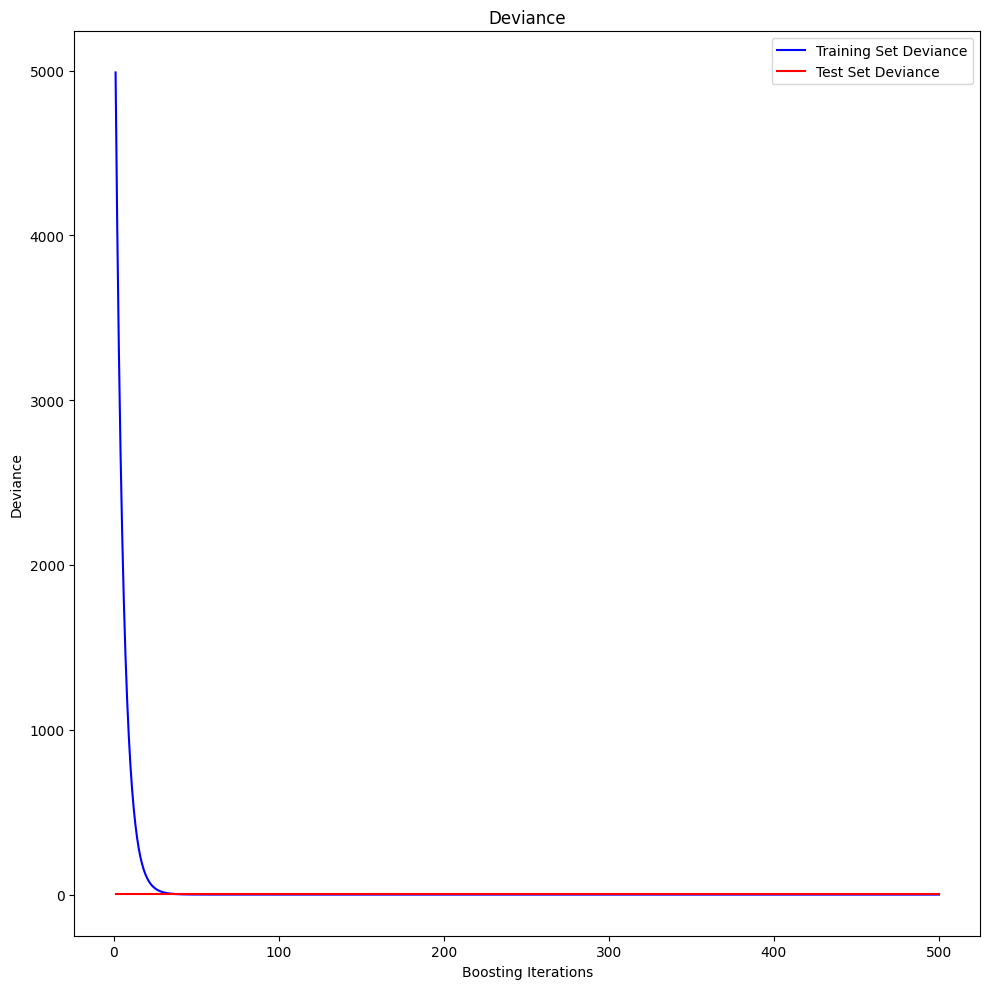

In [ ]:
test_score = np.zeros((500,), dtype = np.float64)
for i , pred in enumerate(gbr2.staged_predict(X_testn)):
    test_score[i] = mean_squared_error(y_testn , pred2)

fig = plt.figure(figsize = (10 , 10))
plt.subplot(1,1,1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1 , gbr2.train_score_ , 'b-' , label = 'Training Set Deviance')
plt.plot(np.arange(500) + 1 , test_score , 'r-' , label = 'Test Set Deviance')
plt.legend(loc = 'upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()